# Model validation altimetry

Note: this notebook requires the model output data

In [1]:
import mikeio
import modelskill as ms
import helper as h

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"
msh = mikeio.open("../input/mesh_EMOD.mesh")
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
altlist = h.get_altimetry_obs(quality=None)

In [18]:
ds = mikeio.read(mr_fn, items=0, time="2023")
mr = ms.DfsuModelResult(ds[0], name="MIKE21")
mr


<DfsuModelResult>: MIKE21
Time: 2023-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: Surface Elevation [m]

In [19]:
cc = ms.match(obs=altlist, mod=mr)
cc

c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\modelskill\model\_base.py:69: UserWarning: No time overlap. Observation 'j2' outside model time range! 
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.ve

ValueError: No time overlap!

In [11]:
cmps = []
for o in altlist:
    cmp = ms.match(obs=o, mod=mr)
    cmps.append(cmp.remove_bias())
cc = ms.ComparerCollection(cmps)

c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(
c:\Users\jem\Source\WaterBench-Oresund\.venv\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be repl

<Axes: title={'center': 'MIKE21 vs 3a'}, xlabel='Observation, Surface Elevation [meter]', ylabel='Model, Surface Elevation [meter]'>

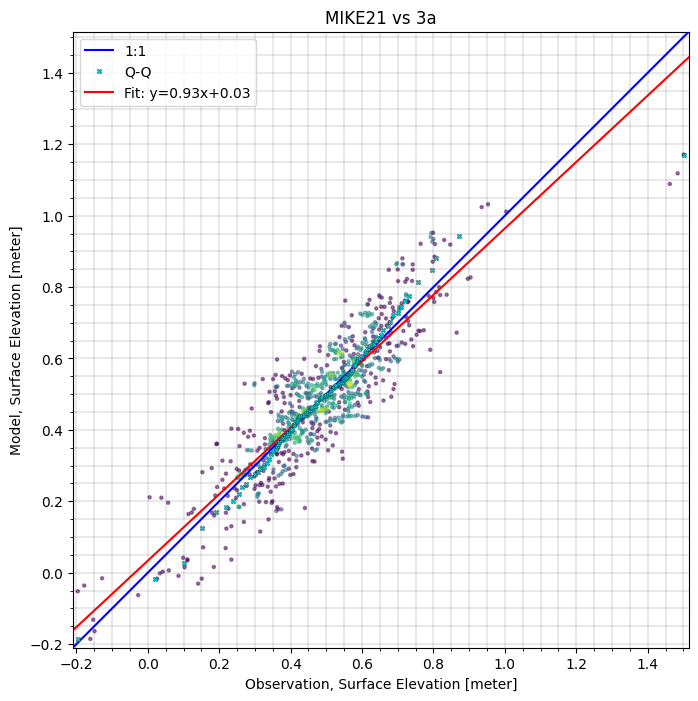

In [16]:
cc["3a"].plot.scatter()

In [13]:
cc.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,771,3.859141e-17,0.087599,0.087599,0.068940,0.883946,0.180158,0.752873
3b,268,4.971148e-18,0.079747,0.079747,0.062128,0.921711,0.190804,0.802579
6a,286,3.105519e-18,0.092176,0.092176,0.064506,0.910529,0.287789,0.767196
c2,473,7.041584e-18,0.083587,0.083587,0.063088,0.932434,0.228290,0.841396
j2,392,6.797284e-18,0.070030,0.070030,0.055265,0.948346,0.212701,0.874840
j3,400,2.164935e-17,0.080240,0.080240,0.060544,0.947832,0.224238,0.862894
sa,431,2.369850e-17,0.084099,0.084099,0.063799,0.915929,0.217263,0.816849


In [21]:
cc.save(f"altimetry_skill.ms")

ValueError: could not safely cast array from int64 to int32. While it is not always the case, a common reason for this is that xarray has deemed it safest to encode np.datetime64[ns] or np.timedelta64[ns] values with int64 values representing units of 'nanoseconds'. This is either due to the fact that the times are known to require nanosecond precision for an accurate round trip, or that the times are unknown prior to writing due to being contained in a chunked array. Ways to work around this are either to use a backend that supports writing int64 values, or to manually specify the encoding['units'] and encoding['dtype'] (e.g. 'seconds since 1970-01-01' and np.dtype('int32')) on the time variable(s) such that the times can be serialized in a netCDF3 file (note that depending on the situation, however, this latter option may result in an inaccurate round trip).

In [23]:
cc[0].data

<xarray.Dataset> Size: 31kB
Dimensions:      (time: 771)
Coordinates:
  * time         (time) datetime64[ns] 6kB 2016-03-06T10:00:16 ... 2023-12-10...
    x            (time) float64 6kB 12.55 12.52 12.85 12.72 ... 12.6 12.57 12.53
    y            (time) float64 6kB 55.44 55.38 55.73 ... 55.47 55.42 55.36
    z            float64 8B nan
Data variables:
    Observation  (time) float64 6kB 0.556 0.531 0.34 0.129 ... 0.504 0.511 0.519
    MIKE21       (time) float64 6kB 0.6223 0.6243 0.2652 ... 0.5595 0.5593
Attributes:
    gtype:               track
    modelskill_version:  1.0.0
    weight:              1.0
    name:                3a